# Preparing time series from wide-form data

Shenyue Jia

## Data

- Zillow's publicly available Zillow House Value Index ([ZHVI](https://www.zillow.com/research/data/))
- Columns to be used for analysis
    - Data Type = "ZHVI All Homes (SFR+Condo/Coop) - Time Series - Smoothed - Seasonally Adjusted"
    - Geography = "City"

## Imports and setup

In [48]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates as mdates
from matplotlib import ticker as mticks

import os

In [80]:
# set visualization
fav_style = ('bmh','tableau-colorblind10')
plt.style.use(fav_style)

## Prepare time series

In [49]:
# load data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv'
df = pd.read_csv(url)
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


In [50]:
# Filter the 4 largest cities into a new dataframe
# use SizeRank column

df_sub = df.loc[df['SizeRank'] <= 3]
df_sub

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [51]:
df_sub.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [52]:
# melt the data to long form
melted = pd.melt(df_sub,id_vars=['RegionID', 'SizeRank', 'RegionName', 
                                 'RegionType', 'StateName','State', 'Metro', 
                                 'CountyName'],
                value_name='ZHVI',var_name="Month")
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Month,ZHVI
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [53]:
# convert the 'Date' column values to datetime objects.
melted['Month'] = pd.to_datetime(melted['Month'])
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    1092 non-null   int64         
 1   SizeRank    1092 non-null   int64         
 2   RegionName  1092 non-null   object        
 3   RegionType  1092 non-null   object        
 4   StateName   1092 non-null   object        
 5   State       1092 non-null   object        
 6   Metro       1092 non-null   object        
 7   CountyName  1092 non-null   object        
 8   Month       1092 non-null   datetime64[ns]
 9   ZHVI        1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 85.4+ KB


In [54]:
# set Date as our index
melted = melted.set_index("Month")
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,ZHVI
Month,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
...,...,...,...,...,...,...,...,...,...
2022-08-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0
2022-09-30,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0
2022-09-30,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0


In [55]:
# Resample the dataframe grouped by month
df_ts = melted.groupby('RegionName').resample("M").asfreq()
df_ts

RegionID  SizeRank RegionName RegionType StateName  \
RegionName Month                                                            
Chicago    2000-01-31     17426         3    Chicago       city        IL   
           2000-02-29     17426         3    Chicago       city        IL   
           2000-03-31     17426         3    Chicago       city        IL   
           2000-04-30     17426         3    Chicago       city        IL   
           2000-05-31     17426         3    Chicago       city        IL   
...                         ...       ...        ...        ...       ...   
New York   2022-05-31      6181         0   New York       city        NY   
           2022-06-30      6181         0   New York       city        NY   
           2022-07-31      6181         0   New York       city        NY   
           2022-08-31      6181         0   New York       city        NY   
           2022-09-30      6181         0   New York       city        NY   

                      State                                  Metro  \
RegionName Month                                                     
Chicago    2000-01-31    IL     Chicago-Naperville-Elgin, IL-IN-WI   
           2000-02-29    IL     Chicago-Naperville-Elgin, IL-IN-WI   
           2000-03-31    IL     Chicago-Naperville-Elgin, IL-IN-WI   
           2000-04-30    IL     Chicago-Naperville-Elgin, IL-IN-WI   
           2000-05-31    IL     Chicago-Naperville-Elgin, IL-IN-WI   
...                     ...                                    ...   
New York   2022-05-31    NY  New York-Newark-Jersey City, NY-NJ-PA   
           2022-06-30    NY  New York-Newark-Jersey City, NY-NJ-PA   
           2022-07-31    NY  New York-Newark-Jersey City, NY-NJ-PA   
           2022-08-31    NY  New York-Newark-Jersey City, NY-NJ-PA   
           2022-09-30    NY  New York-Newark-Jersey City, NY-NJ-PA   

                          CountyName      ZHVI  
RegionName Month                                
Chicago    2000-01-31    Cook County  166139.0  
           2000-02-29    Cook County  166536.0  
           2000-03-31    Cook County  167368.0  
           2000-04-30    Cook County  168826.0  
           2000-05-31    Cook County  170499.0  
...                              ...       ...  
New York   2022-05-31  Queens County  768797.0  
           2022-06-30  Queens County  773944.0  
           2022-07-31  Queens County  777692.0  
           2022-08-31  Queens County  779960.0  
           2022-09-30  Queens County  781622.0  

[1092 rows x 9 columns]

## Plot data and answer questions

### Plot data

In [58]:
plot_df = df_ts.drop(columns = ['RegionID', 'RegionName', 'SizeRank','RegionType',
                                'StateName','State','Metro','CountyName'])
plot_df

ZHVI
RegionName Month               
Chicago    2000-01-31  166139.0
           2000-02-29  166536.0
           2000-03-31  167368.0
           2000-04-30  168826.0
           2000-05-31  170499.0
...                         ...
New York   2022-05-31  768797.0
           2022-06-30  773944.0
           2022-07-31  777692.0
           2022-08-31  779960.0
           2022-09-30  781622.0

[1092 rows x 1 columns]

In [59]:
# unstack data
unstacked = plot_df.unstack(level=0)
unstacked

ZHVI                                
RegionName   Chicago   Houston Los Angeles  New York
Month                                               
2000-01-31  166139.0  109068.0    234181.0  253690.0
2000-02-29  166536.0  109079.0    234401.0  255517.0
2000-03-31  167368.0  108878.0    235513.0  257207.0
2000-04-30  168826.0  108881.0    237589.0  260310.0
2000-05-31  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-31  312487.0  265558.0    990391.0  768797.0
2022-06-30  314663.0  268901.0    992337.0  773944.0
2022-07-31  315910.0  271059.0    992630.0  777692.0
2022-08-31  315587.0  272400.0    978196.0  779960.0
2022-09-30  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

In [77]:
# create tick locators and formatters
loc_5year = mdates.YearLocator(5)
fmt_year = mdates.DateFormatter("%Y")
loc_year = mdates.YearLocator(1)

In [82]:
# function for formatting money in thousands
def thousands(x, pos):
    xk = x/1000
    return f"${xk:,.0f}K"
str_fmt = mticks.FuncFormatter(thousands)

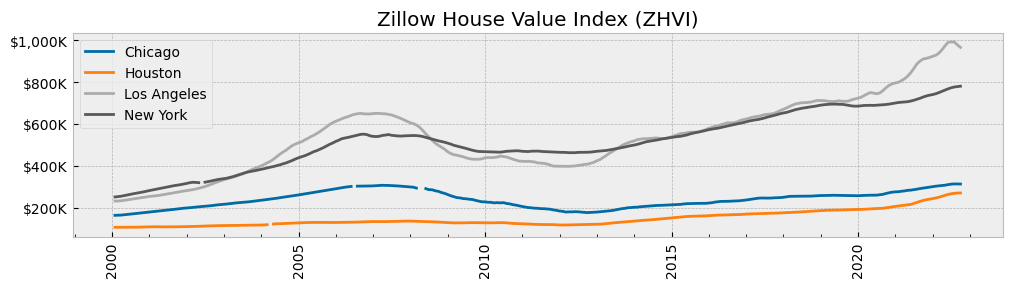

In [81]:
# plot ZHVI for four cities
plt.rcParams['figure.figsize'] = (12,3)
fig, ax = plt.subplots()

ax.plot(unstacked.index, unstacked.values, label = unstacked['ZHVI'].columns)

ax.set(title = 'Zillow House Value Index (ZHVI)',xlabel = '', ylabel = '')
ax.xaxis.set_major_locator(loc_5year)
ax.xaxis.set_major_formatter(fmt_year)
ax.xaxis.set_minor_locator(loc_year)

ax.yaxis.set_major_formatter(str_fmt)

ax.legend();
fig = ax.get_figure()
fig.autofmt_xdate(rotation = 90, ha = 'center')

In [83]:
## Save to PNG
FOLDER = "PNG/"
isExist = os.path.exists(FOLDER)
    
if isExist == False:  
      os.makedirs(FOLDER, exist_ok=True)
        
fig.savefig(f'{FOLDER}/ZHVI-monthly.png',bbox_inches='tight')

### 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [84]:
# check the format of index for slicing
unstacked.index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31',
               '2022-08-31', '2022-09-30'],
              dtype='datetime64[ns]', name='Month', length=273, freq='M')

In [85]:
# slice data and sort
unstacked.loc[pd.IndexSlice['2008-12-31']].sort_values(ascending=False)

      RegionName 
ZHVI  New York       510309.0
      Los Angeles    469294.0
      Chicago        265306.0
      Houston        131283.0
Name: 2008-12-31 00:00:00, dtype: float64

**Answer**
- **New York** has the highest typical home value (reflected by ZHVI) at the end of 2008 among the 4 cities we have inspected
- **Houston** has the lowest typical home value at the same period

### 2) How much did the home values change from November 2008 to December 2008 (in dollars)?

In [86]:
# calculate home values change
unstacked_diff = unstacked.diff()
unstacked_diff

ZHVI                             
RegionName Chicago Houston Los Angeles New York
Month                                          
2000-01-31     NaN     NaN         NaN      NaN
2000-02-29   397.0    11.0       220.0   1827.0
2000-03-31   832.0  -201.0      1112.0   1690.0
2000-04-30  1458.0     3.0      2076.0   3103.0
2000-05-31  1673.0   -47.0      2524.0   2894.0
...            ...     ...         ...      ...
2022-05-31  2838.0  4457.0     17223.0   6476.0
2022-06-30  2176.0  3343.0      1946.0   5147.0
2022-07-31  1247.0  2158.0       293.0   3748.0
2022-08-31  -323.0  1341.0    -14434.0   2268.0
2022-09-30  -158.0   239.0    -11601.0   1662.0

[273 rows x 4 columns]

In [89]:
# check the change from Nov to Dec, 2008
unstacked_diff.loc[pd.IndexSlice['2008-12-31']].sort_values(ascending=True)

      RegionName 
ZHVI  Los Angeles   -12611.0
      Chicago        -5753.0
      New York       -4458.0
      Houston         -964.0
Name: 2008-12-31 00:00:00, dtype: float64

**Answer**

From November to December, 2008:

- Typical home values in Los Angeles dropped by $12,611

- Typical home values in Chicago dropped by $5,753

- Typical home values in New York dropped by $4,458

- Typical home values in Houston dropped by $946